In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Функция для создания выборки размера size из равномерного распределения с параметрами a,b
def generate_data_uniform(a, b, size:int):
    return np.random.uniform(a,b, size)

In [3]:
#Функция, вычисляющая значение ЭФР в точке x для выборки data
def IDF(data, x):
    return len(data[data<x])/len(data)
    

In [4]:
#Функция, вычисляющая значение функции распределения в точке x для равномерного распределения с параметрами a,b
def F(data, x, a , b ):
    if x<a:
        return 0
    elif x<b:
        return (x-a)/(b-a)
    else:
        return 1    

In [5]:
#Функция, считающая значения sup|F_n(x) - F(x)| при различных размерах выборки: от start_n до end_n в количестве size
#Возвращает массив размеров выборки, по которым вычислялось и соответствующие им sup|F_n(x) - F(x)|
def G_K(start_n, end_n, size):
    a = 0.0
    b = 10.0
    #Создание массива различных n(размер выборки) с переданными в функцию параметрами
    N = np.linspace(start_n, end_n, num=size, dtype = int)
    #Создание массива различных x, в которых будет считаться sup|F_n(x) - F(x)|
    x_steps = np.linspace(a, b, num=size)
    sups = []
    for n in N:
        #Генерация выборки
        X =  generate_data_uniform(a, b, n)
        sup = 0
        #Поиск sup|F_n(x) - F(x)|
        for x in x_steps:
            sup = max(sup,np.abs(IDF(X, x) - F(X,x,a,b)))
        sups.append(sup)
    return N, sups

In [6]:
#Создание графика по вычисленным выше значениям
def proof_glivenko_cantelli_theorem():
    n, sup = G_K(1000, 100_000, 100)
    fig, ax = plt.subplots()
    ax.plot(n, sup)

    ax.set(xlabel='n', ylabel='sup(|F(x)-Fn(x)|)',
       title='Graph of n and supremums')
    ax.grid()
    plt.show()

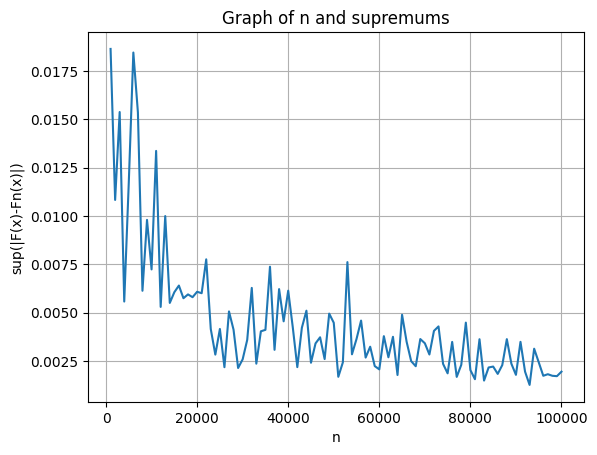

In [7]:
proof_glivenko_cantelli_theorem()